In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import cmocean.cm as cmo
import cartopy.crs as ccrs


//anaconda/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# Forcing mechanisms for drifters entering and exiting Galveston Bay

An on-going area of interest for response efforts at the Texas General Land Office is under what conditions oil may exit or enter a given bay. Here, we limit our scope to Galveston Bay and use statistics to find relationships between drifter entrances/exits and potential forcing mechanisms.

## Relevant previous effort

This work builds on already-existing shelf model output (DJ's [20 year hindcast](http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg)) and Dongyu's effort to blended the "coarse" resolution Galveston Bay model with the shelf model to create a blended model product for seamlessly running drifters. The drifter simulations here are run using the blended model product.

## Run the drifters

The drifters were run on hafen (`/raid/home/kthyng/projects/bay/`) using the run.py script. Pertinent simulation details:

* Output drifter locations every 15 minutes
* Ran forward/backward for 14 days
* Circulation model output is hourly
* Surface drifters
* No subgrid diffusion
* 300 meter initial distance between drifters
* Drifters started in uniform array within bay
* Simulations are started from 4 dates:
 * 2010-02-01: winter winds, high river discharge
 * 2011-02-01: winter winds, low river discharge
 * 2010-07-01: summer winds, high river discharge
 * 2011-07-01: summer winds, low river discharge
* Simulations are run forward from the dates listed above, and backward from 2 weeks after the dates listed above. That is, the forward- and backward-running simulations are simulataneous but represent drifters exiting and entering the domain (respectively).
* New simulations are started every 4 hours for 2 weeks for a total number of simulations of: 6 * 14=84 simulations for each set (i.e. season and run direction)
* Each simulation has 13,340 drifters, so each set (i.e. season and run direction) has 13340 * 84=1,120,560 drifters or over 1.1 million.

Note that the appropriate file names for these simulations fit the pattern: `2010-02-01_forward_14days_dx300` (or backward).

The simulations have already been run using:

    python2 run.py > logs/[etc] &

The drifter tracks are stored on hafen in `tracks`.

The figure below shows the initial drifter locations.
![](figures/starting_points_bay_dx300.png)

## When are drifters moving between the bay and the shelf?

### Run the analysis
This analysis was run with calcs.io() with changing refdates through the simulation start dates (2010-02-01, 2011-02-01, 2010-07-01, 2011-07-01) and also the backward-running simulations (2010-02-15, 2011-02-15, 2010-07-15, 2011-07-15). This gives files of the pattern `calcs/enterexit_sim3_[yyyy]-[mm]-forward_14days_dx300` (or backward).

I calculate the number of drifters that are outside of the bay at each time step, or within the polygon plotted below.

ALSO EXPLAIN THE .npz FILES MAKING NOW. PROBABLY NEED TO UPDATE CODE SO THAT IT RUNS WITHOUT CHANGING THE __NAME__

//anaconda/lib/python3.5/site-packages/matplotlib-2.0.2+4065.gde2755c-py3.5-macosx-10.5-x86_64.egg/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


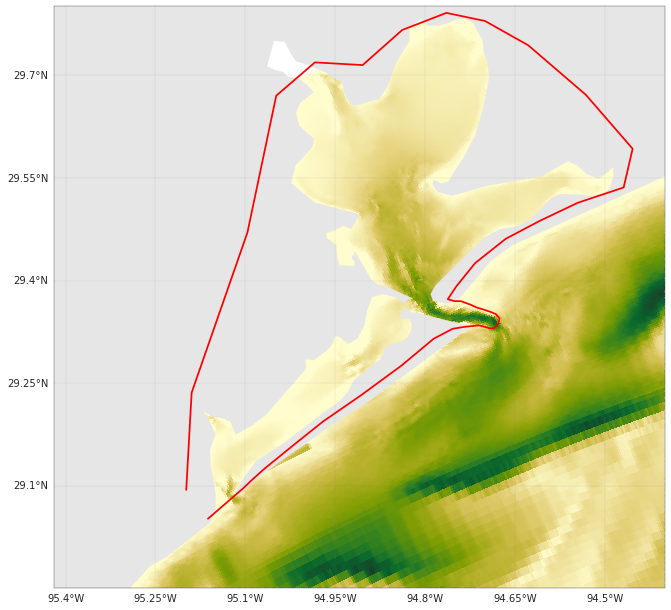

In [17]:
import plots

datestr='2010-07-05T00'

fname = 'calcs/s_2010-07-05T00.npz'
if not os.path.exists(fname):
    m = xr.open_dataset('/rho/raid/dongyu/201007_new/blended201007.nc')  
    lon = m['lon'].isel(xr=slice(1,-1), yr=slice(1,-1)).data
    lat = m['lat'].isel(xr=slice(1,-1), yr=slice(1,-1)).data
    u = m['u'].sel(ocean_time=datestr).isel(yr=slice(1,-1)).data
    v = m['v'].sel(ocean_time=datestr).isel(xr=slice(1,-1)).data
    u = plots.resize(u, 1)
    v = plots.resize(v, 0)
    var = np.sqrt(u**2 + v**2)
else:
    d = np.load(fname)
    lon = d['lon']; lat = d['lat']; s = d['s']
fig, ax = plots.setup()
mappable = ax.pcolormesh(lon, lat, s, cmap=cmo.speed, transform=ccrs.PlateCarree(), vmin=0, vmax=1.2)
# used ginput to click out points, which I edited a little and then saved
# pts = plt.ginput(n=-1, timeout=0)
baypath = np.load('calcs/pathbayandjetty.npz', encoding='latin1')['pathll'].item()
ax.plot(baypath.vertices[:,0], baypath.vertices[:,1], 'r', transform=ccrs.PlateCarree())

UPDATE WITH SMEAN

//anaconda/lib/python3.5/site-packages/matplotlib-2.0.2+4065.gde2755c-py3.5-macosx-10.5-x86_64.egg/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


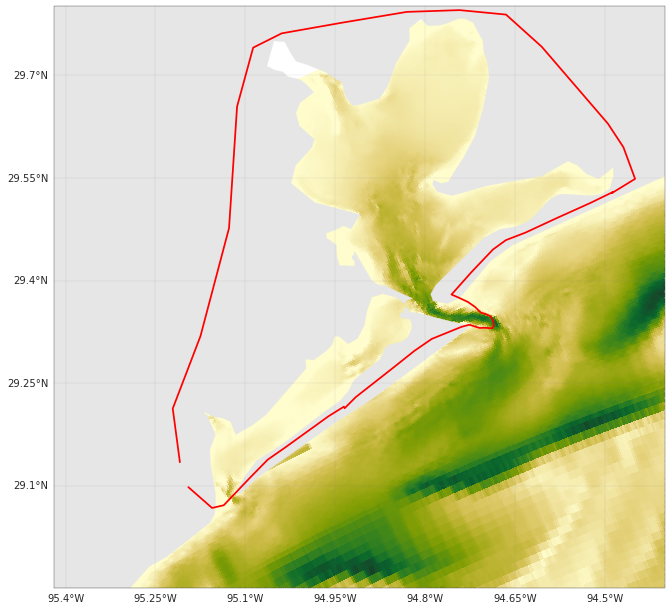

In [18]:
import plots

datestr='2010-07-05T00'

fname = 'calcs/s_2010-07-05T00.npz'
if not os.path.exists(fname):
    m = xr.open_dataset('/rho/raid/dongyu/201007_new/blended201007.nc')  
    lon = m['lon'].isel(xr=slice(1,-1), yr=slice(1,-1)).data
    lat = m['lat'].isel(xr=slice(1,-1), yr=slice(1,-1)).data
    u = m['u'].sel(ocean_time=datestr).isel(yr=slice(1,-1)).data
    v = m['v'].sel(ocean_time=datestr).isel(xr=slice(1,-1)).data
    u = plots.resize(u, 1)
    v = plots.resize(v, 0)
    var = np.sqrt(u**2 + v**2)
else:
    d = np.load(fname)
    lon = d['lon']; lat = d['lat']; s = d['s']
fig, ax = plots.setup()
mappable = ax.pcolormesh(lon, lat, s, cmap=cmo.speed, transform=ccrs.PlateCarree(), vmin=0, vmax=1.2)
# used ginput to click out points, which I edited a little and then saved
# pts = plt.ginput(n=-1, timeout=0)
baypath = np.load('calcs/pathbayandjetty.npz', encoding='latin1')['pathll'].item()
ax.plot(baypath.vertices[:,0], baypath.vertices[:,1], 'r', transform=ccrs.PlateCarree())

## Run calculations for when drifters are inside vs outside for the new model and new superposition

In [ ]:
import calcs
calcs.io()

## Combine previous calculations into dataframes.

In [ ]:
calcs.make_dfs()

### Calculate dataframes
Summarize into a `pandas` dataframe the forcing mechanisms (read in from the blended model product, the shelf model, etc) for each time period and combine it with the time series summary of when drifters are outside the domain. Do this using `calcs.make_dfs()`, and the files are in the form `df_2010-02_backward.csv`.

This was all done on hafen, but the df files have been copied to Tahoma too.

## individual runs

import calcs
calcs.io(ind=0)  # first index, to get 2010-07-01T00.csv
calcs.make_dfs(which='2010-07-01T00.csv')  # first index, to make df_2010-07-01T00.csv summary for plotting

## make plots for one file
import plots
plots.drifters(which='df_2010-07-01T00.csv')  # makes animation of model output with drifter information only from one simulation



import calcs
calcs.io(ind=10)  # first index, to get 2010-07-02T16.csv
calcs.make_dfs(which='2010-07-02T16.csv')  # first index, to make df_2010-07-01T00.csv summary for plotting
import plots
plots.drifters(which='df_2010-07-02T16.csv')  # makes animation of model output with drifter information only from one simulation


import calcs
calcs.io(ind=40)  # first index, to get 2010-07-02T16.csv
calcs.make_dfs(which='2010-07-07T16.csv')  # first index, to make df_2010-07-01T00.csv summary for plotting
import plots
plots.drifters(which='df_2010-07-07T16.csv')  # makes animation of model output with drifter information only from one simulation



import calcs
calcs.io(ind=70)  # first index, to get 2010-07-02T16.csv
calcs.make_dfs(which='2010-07-12T16.csv')  # first index, to make df_2010-07-01T00.csv summary for plotting
import plots
plots.drifters(which='df_2010-07-12T16.csv')  # makes animation of model output with drifter information only from one simulation


import calcs
calcs.io(ind=80)  # first index, to get 2010-07-02T16.csv
calcs.make_dfs(which='2010-07-14T08.csv')  # first index, to make df_2010-07-01T00.csv summary for plotting
import plots
plots.drifters(which='df_2010-07-14T08.csv')  # makes animation of model output with drifter information only from one simulation


### Make drifter movies

`bay/plots.py`

new superposition July 2010

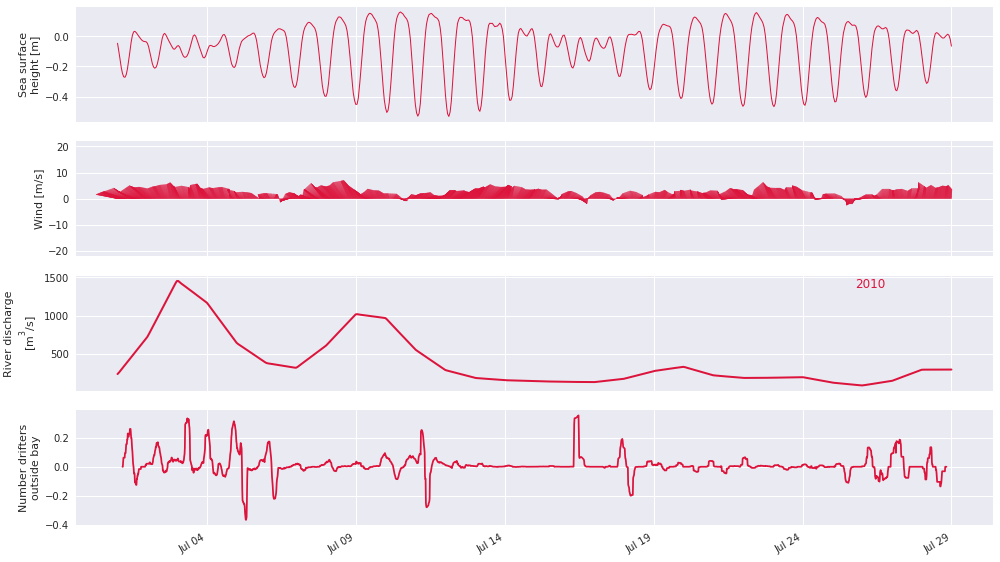

In [8]:
import plots
plots.conditions(season='summer', direction='forward', plotdrifters=True, simname='newsuperposition')

#### Drifters exiting domain: Feb 2010

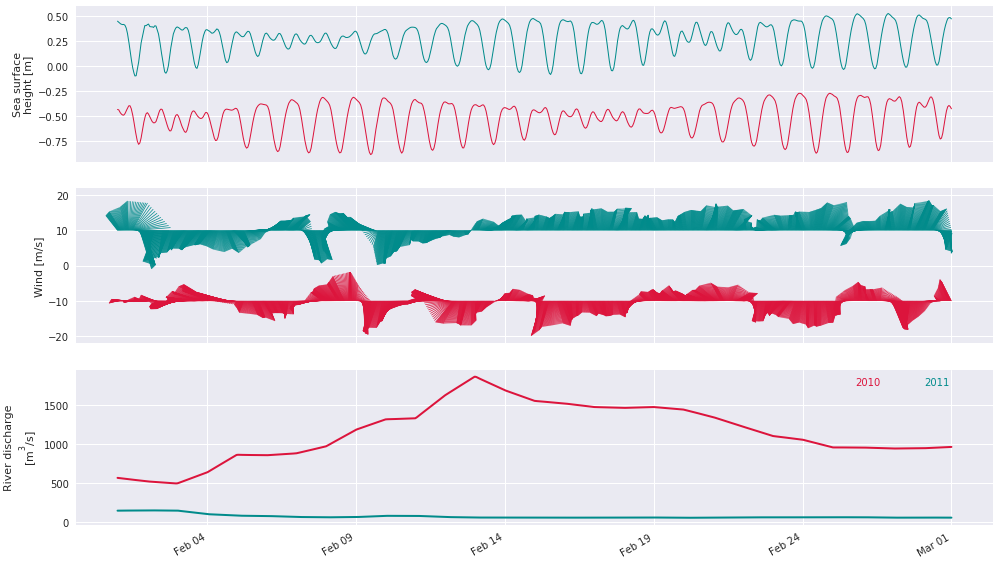

In [6]:
%matplotlib inline
import plots
plots.conditions(season='winter', direction='forward', plotdrifters=False)

#### Drifters exiting domain: July 2010

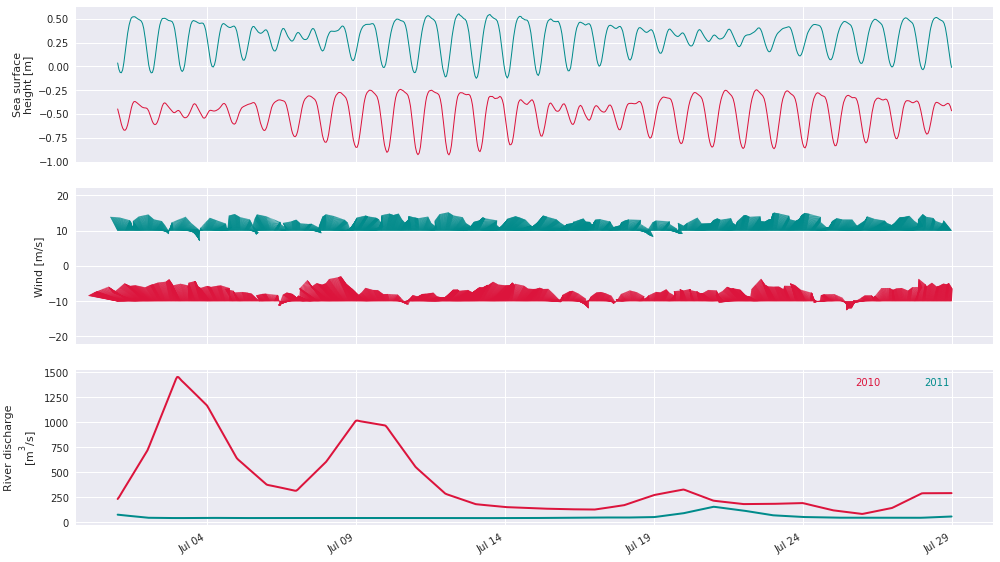

In [7]:
%matplotlib inline
import plots
plots.conditions(season='summer', direction='forward', plotdrifters=False)

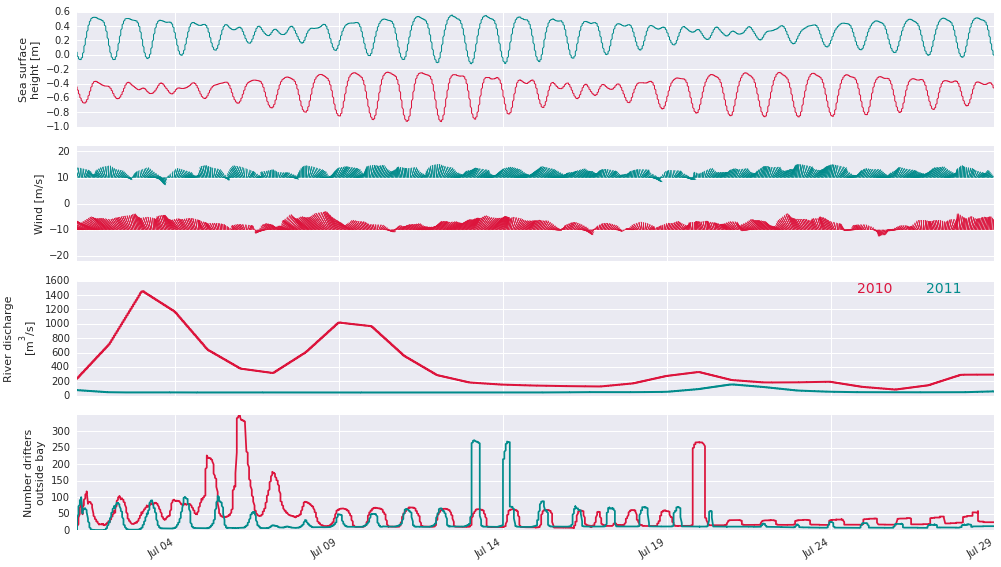

In [3]:
plots.conditions(season='summer', direction='forward')

## Find relationships between drifter behavior and forcing mechanisms for each set of simulations individually

Run statistics in calcs.stats().

subtidal vs. tidal


In [46]:
import calcs
calcs.stats(which='drifters', direction='forward')


Simulation set: calcs/enterexit/newsuperposition/df_2010-07.csv
Number of combinations checked: 1511
Top adjusted r^2, lowest BIC performers, no p>0.1: 5
Adjusted r^2: 0.69
BIC: 279
coefficients: 
Intercept       -1.588275
river           -3.254995
vwind           -0.928599
s                2.122604
dzeta_floor0    16.058773
zeta_shifted     1.527899
pvalues: 
river           9.077257e-07
vwind           5.916733e-04
s               1.549090e-13
dzeta_floor0    2.966759e-23
zeta_shifted    6.344718e-14

Adjusted r^2: 0.69
BIC: 279
coefficients: 
Intercept        -1.588275
vwind            -0.928599
s                 2.122604
river_shifted    -3.254995
dzeta_floor0     16.058773
zeta_shifted      1.527899
pvalues: 
vwind            5.916733e-04
s                1.549090e-13
river_shifted    9.077257e-07
dzeta_floor0     2.966759e-23
zeta_shifted     6.344718e-14

Adjusted r^2: 0.69
BIC: 280
coefficients: 
Intercept        138.971293
s                  1.689341
river_shifted     -2.8682

In [47]:
import calcs
calcs.stats(which='subtidal', direction='forward')


Simulation set: calcs/enterexit/newsuperposition/df_2010-07.csv
Number of combinations checked: 125
Top adjusted r^2, lowest BIC performers, no p>0.1: 5
Adjusted r^2: 0.44
BIC: 5612
coefficients: 
Intercept   -7.406973
river        0.800169
uwind        0.302028
theta       -4.033731
pvalues: 
river    2.472813e-252
uwind     8.248174e-55
theta     1.225609e-05

Adjusted r^2: 0.44
BIC: 5612
coefficients: 
Intercept       -7.406973
uwind            0.302028
river_shifted    0.800169
theta_shifted   -4.033731
pvalues: 
uwind             8.248174e-55
river_shifted    2.472813e-252
theta_shifted     1.225609e-05

Adjusted r^2: 0.44
BIC: 5612
coefficients: 
Intercept       -7.406973
river            0.800169
uwind            0.302028
theta_shifted   -4.033731
pvalues: 
river            2.472813e-252
uwind             8.248174e-55
theta_shifted     1.225609e-05

Adjusted r^2: 0.44
BIC: 5612
coefficients: 
Intercept       -7.406973
uwind            0.302028
theta           -4.033731
river_sh

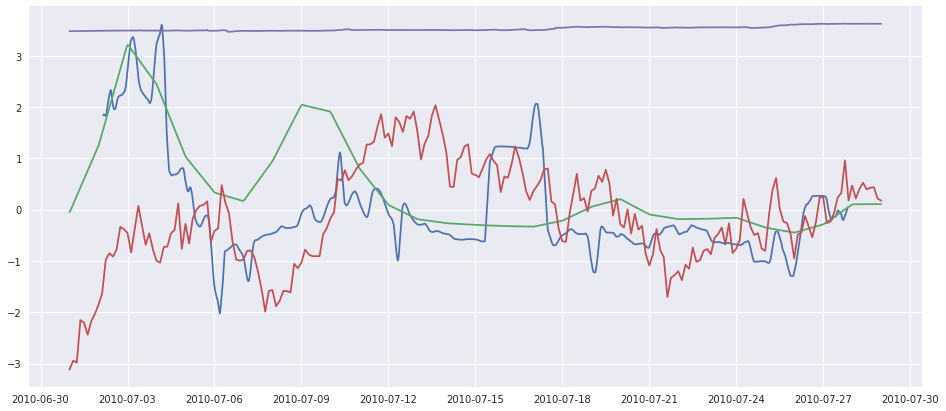

In [76]:
import pandas as pd
df = pd.read_csv('calcs/enterexit/newsuperposition/df_2010-07.csv', parse_dates=True, index_col=0)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,7))
plt.plot(calcs.transform(df, 'drifters_subtidal'))
plt.plot(calcs.transform(df, 'river'))
plt.plot(calcs.transform(df, 'uwind'))
# plt.plot(df['theta'])
plt.plot(calcs.transform(df, 'theta')*-2)
# plt.plot(df['zeta'])
# plt.xlim('2010-07-04','2010-07-12')

In [50]:
import calcs
calcs.stats(which='tidal', direction='forward')


Simulation set: calcs/enterexit/newsuperposition/df_2010-07.csv
Number of combinations checked: 11
Top adjusted r^2, lowest BIC performers, no p>0.1: 5
Adjusted r^2: 0.50
BIC: 271
coefficients: 
Intercept       -3.101678
dzeta_floor0    17.494008
zeta_shifted     0.619990
pvalues: 
dzeta_floor0    4.553631e-10
zeta_shifted    3.307079e-02

Adjusted r^2: 0.21
BIC: 638
coefficients: 
Intercept       0.067697
dzeta           2.322770
zeta_shifted    1.012076
pvalues: 
dzeta           2.963959e-02
zeta_shifted    7.776264e-11

Adjusted r^2: 0.19
BIC: 637
coefficients: 
Intercept       0.430403
zeta_shifted    1.079307
pvalues: 
zeta_shifted    2.946304e-12

Adjusted r^2: 0.15
BIC: 3794
coefficients: 
Intercept      -0.666531
zeta           -0.475086
dzeta_floor0    2.714197
pvalues: 
zeta            1.505371e-29
dzeta_floor0    9.309094e-04

Adjusted r^2: 0.12
BIC: 6705
coefficients: 
Intercept   -0.324504
zeta        -0.350713
dzeta        1.390860
pvalues: 
zeta     1.324580e-66
dzeta  

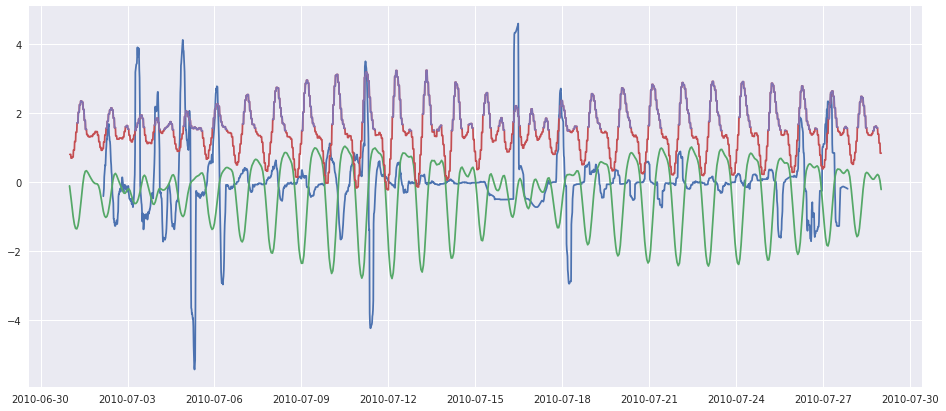

In [82]:
import pandas as pd
df = pd.read_csv('calcs/enterexit/newsuperposition/df_2010-07.csv', parse_dates=True, index_col=0)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,7))
plt.plot(calcs.transform(df, 'drifters_tidal'))
plt.plot(calcs.transform(df, 'zeta'))
plt.plot(calcs.transform(df, 'dzeta')*10)
plt.plot(calcs.transform(df, 'dzeta_floor0')*10)
# plt.plot(df['zeta'])
# plt.xlim('2010-07-04','2010-07-12')

(21303360, 21314880)

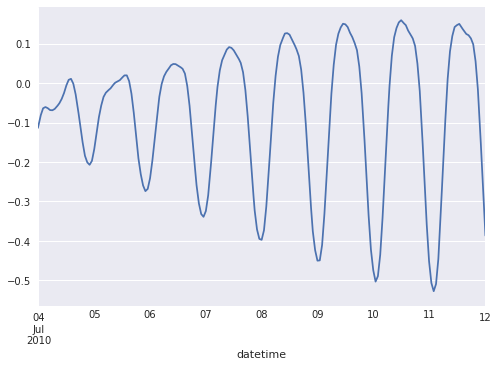

In [80]:
df['zeta'].plot()
plt.xlim('2010-07-04','2010-07-12')

In [81]:
df['zeta']

datetime
2010-07-01 00:00:00   -0.046910
2010-07-01 00:15:00   -0.059111
2010-07-01 00:30:00   -0.071312
2010-07-01 00:45:00   -0.083514
2010-07-01 01:00:00   -0.095715
2010-07-01 01:15:00   -0.109859
2010-07-01 01:30:00   -0.124003
2010-07-01 01:45:00   -0.138147
2010-07-01 02:00:00   -0.152291
2010-07-01 02:15:00   -0.165877
2010-07-01 02:30:00   -0.179463
2010-07-01 02:45:00   -0.193049
2010-07-01 03:00:00   -0.206635
2010-07-01 03:15:00   -0.216592
2010-07-01 03:30:00   -0.226549
2010-07-01 03:45:00   -0.236506
2010-07-01 04:00:00   -0.246463
2010-07-01 04:15:00   -0.251938
2010-07-01 04:30:00   -0.257413
2010-07-01 04:45:00   -0.262888
2010-07-01 05:00:00   -0.268363
2010-07-01 05:15:00   -0.268998
2010-07-01 05:30:00   -0.269633
2010-07-01 05:45:00   -0.270267
2010-07-01 06:00:00   -0.270902
2010-07-01 06:15:00   -0.266676
2010-07-01 06:30:00   -0.262451
2010-07-01 06:45:00   -0.258225
2010-07-01 07:00:00   -0.254000
2010-07-01 07:15:00   -0.244296
                         ...   

# Feb 2010

Note: What does the -BIC mean in analysis above (now not shown)? Seems like both worse r^2 and more parameters.

In [18]:
import numpy as np
import statsmodels.api as sm
tsa = sm.tsa
df = pd.read_csv('calcs/df_2010-02_forward.csv', parse_dates=True, index_col=0)
istart = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][0] + 1
iend = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][1] + 1
ccf_river = tsa.ccf(df['drifters_subtidal'][istart:iend], df['river'][istart:iend])
# this gives the shift forward necessary for the drifters to correlate best
# with the river discharge
imax = ccf_river.argmax()


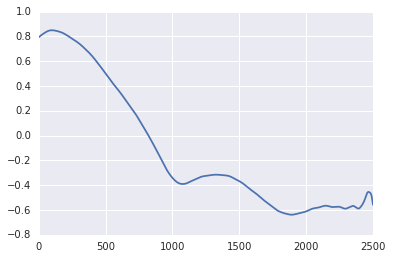

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ccf_river)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:30:06   Log-Likelihood:                -183.62
No. Observations:                2495   AIC:                             375.2
Df Residuals:                    2491   BIC:                             398.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -25.9020      0.385    -67.303      0.000       -26.657   -25.147
uwind             0.0891      0.005     17.370      0.000         0.079     0.099
theta           -13.3206      0.215    -61.963      0.000       -13.742   -12.899
river_shifted     0.8112      0.006    138.041      0.000         0.800     0.823
==============================================================================
Omnibus:                      274.328   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.767
Skew:                          -0.907   Prob(JB):                     8.38e-81
Kurtosis:                       3.504   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

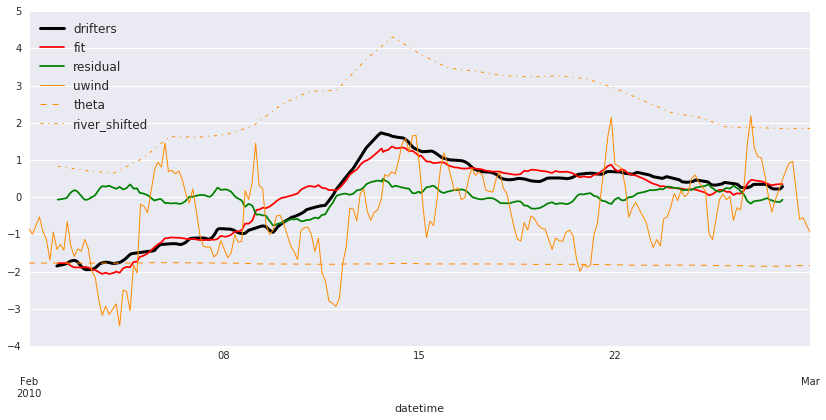

In [1]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 'theta', 'river_shifted']
df = pd.read_csv('calcs/df_2010-02_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


The subtidal drifter signal is found with a rolling mean over 192 points; since there is a point every 15 minutes, this is 192/4=48 hours.

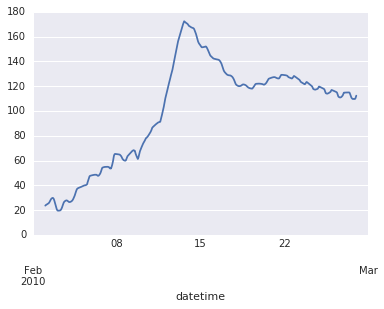

In [69]:
(df['drifters'].rolling(192, center=True).mean()).plot()

Here is instead using pl33, a filter for tidal signals in particular:

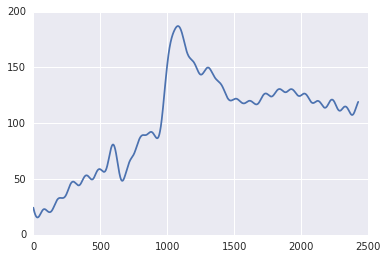

In [93]:
from pl33 import plfilt

dt = (df.index[1] - df.index[0])
dt = dt.seconds/3600.
pl33 = plfilt(dt=dt)
uf, tf = pl33(df['drifters'].values, df.index)
plt.plot(uf)

Here the river shift was important. The code below shows that the 

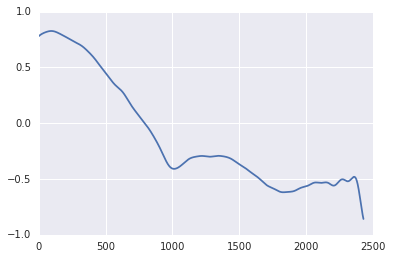

In [98]:
ccf_river = tsa.ccf(uf, df['river'][tf])
plt.plot(ccf_river)

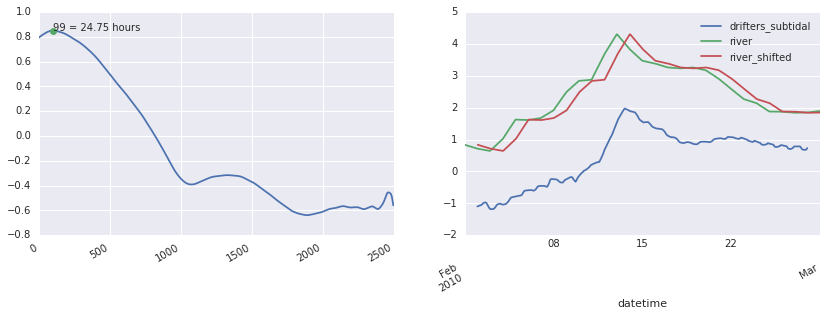

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import calcs

# there are nan's in the signal from the rolling mean, which I change to -999 so t
# I can search for them, and then avoid them by using istart and iend.
istart = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][0] + 1
iend = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][1] + 1
ccf_river = tsa.ccf(df['drifters_subtidal'][istart:iend], df['river'][istart:iend])
# this gives the shift forward necessary for the drifters to correlate best
# with the river discharge
imax = ccf_river.argmax()
# Note: though the signals were shifted for the cross correlation function analysis,
# the shift of 96 is still the shift since both had been shifted.

fig = plt.figure(figsize=(14,4))
# Correlation function
ax1 = fig.add_subplot(121)
ax1.plot(ccf_river)
ax1.plot(imax, ccf_river[imax], 'o')
ax1.text(imax, ccf_river[imax], str(imax) + ' = ' + str(imax/4) + ' hours')
# Show shift of two signals and then aligned
ax2 = fig.add_subplot(122)
calcs.transform(df, 'drifters_subtidal').plot(ax=ax2)
calcs.transform(df, 'river').plot(ax=ax2)
calcs.transform(df, 'river_shifted').plot(ax=ax2)
fig.autofmt_xdate(bottom=0.125)
ax2.legend(['drifters_subtidal', 'river', 'river_shifted'], loc='best')

#### Feb 2011

For this case, the cross correlation between the river and subtidal drifter signal ends up weird (see next plot)

In [99]:
import numpy as np
import statsmodels.api as sm
tsa = sm.tsa
df = pd.read_csv('calcs/df_2011-02_forward.csv', parse_dates=True, index_col=0)
istart = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][0] + 1
iend = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][1] + 1
ccf_river = tsa.ccf(df['drifters_subtidal'][istart:iend], df['river'][istart:iend])
# this gives the shift forward necessary for the drifters to correlate best
# with the river discharge
imax = ccf_river.argmax()


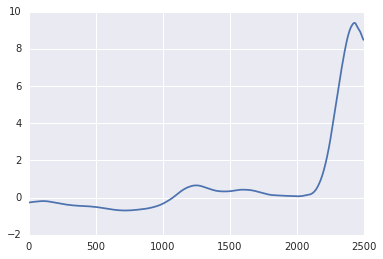

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ccf_river)
# ccf_river.size

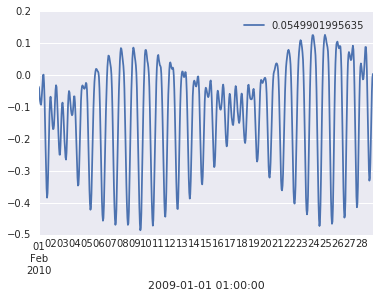

In [122]:
zeta['2010-02'].plot()  # does this matter for anything? (the long-term slope)

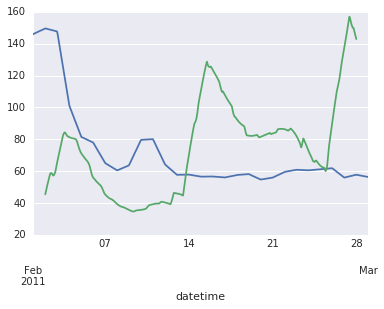

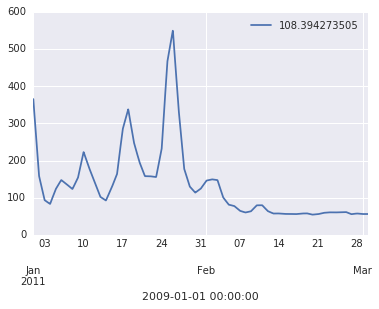

In [115]:
# MAYBE I NEED TO LOOK AT CONDITIONS BEFORE THE ACTUAL TIME PERIOD
df['river'].plot()
df['drifters_subtidal'].plot()
river = pd.read_csv('calcs/river2009-2011.csv', parse_dates=True, index_col=0).resample('15T').interpolate()
river['2011-01-01':'2011-03-01'].plot()

In [120]:
istart = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][0] + 1
iend = np.where(np.diff(df['drifters_subtidal'].fillna(-999) == -999))[0][1] + 1
tsa.ccf(df['drifters_subtidal'][istart:iend].values, river['2011-01-01':'2011-03-01'].values)

ValueError: object too deep for desired array

In [117]:
river['2011-01-01':'2011-03-01']

,108.394273505
2009-01-01 00:00:00,
2011-01-01 00:00:00,365.262447
2011-01-01 00:15:00,362.883457
2011-01-01 00:30:00,360.504467
2011-01-01 00:45:00,358.125476
2011-01-01 01:00:00,355.746486
2011-01-01 01:15:00,353.681799
2011-01-01 01:30:00,351.617113
2011-01-01 01:45:00,349.552426
2011-01-01 02:00:00,347.487740


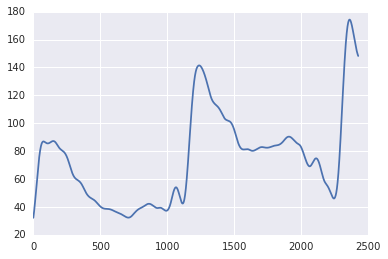

In [100]:
uf, tf = pl33(df['drifters'].values, df.index)
plt.plot(uf)

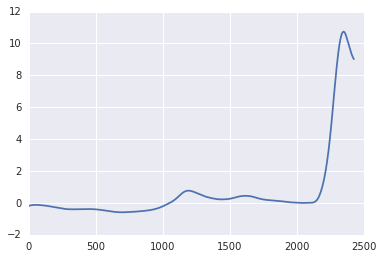

In [101]:
ccf_river = tsa.ccf(uf, df['river'][tf])
plt.plot(ccf_river)

In [103]:
1100/4/24

11.458333333333334

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     916.4
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        23:14:43   Log-Likelihood:                -2616.0
No. Observations:                2498   AIC:                             5240.
Df Residuals:                    2494   BIC:                             5263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -92.3523      1.893    -48.782      0.000       -96.065   -88.640
uwind          0.2503      0.015     16.435      0.000         0.220     0.280
theta        -52.6167      1.099    -47.867      0.000       -54.772   -50.461
river          2.1202      0.276      7.674      0.000         1.578     2.662
==============================================================================
Omnibus:                       10.342   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.966
Skew:                           0.015   Prob(JB):                       0.0186
Kurtosis:                       2.725   Cond. No.                         334.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

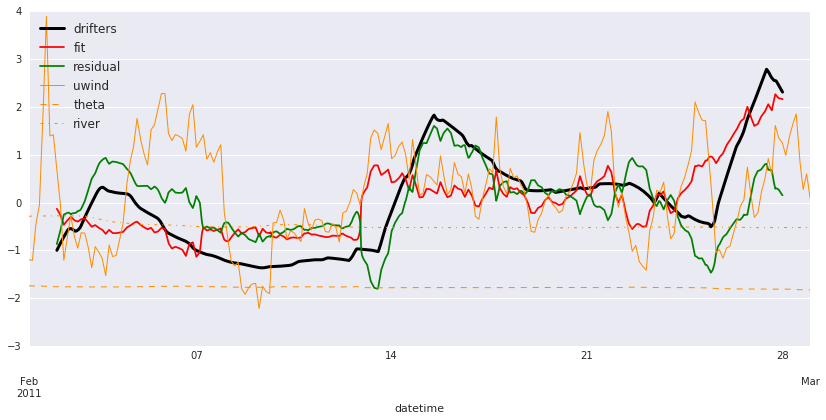

In [6]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 'theta', 'river']
df = pd.read_csv('calcs/df_2011-02_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


In [5]:
dfscaled['river_shifted']

datetime
2011-02-01 00:00:00         NaN
2011-02-01 00:15:00         NaN
2011-02-01 00:30:00         NaN
2011-02-01 00:45:00         NaN
2011-02-01 01:00:00         NaN
2011-02-01 01:15:00         NaN
2011-02-01 01:30:00         NaN
2011-02-01 01:45:00         NaN
2011-02-01 02:00:00         NaN
2011-02-01 02:15:00         NaN
2011-02-01 02:30:00         NaN
2011-02-01 02:45:00         NaN
2011-02-01 03:00:00         NaN
2011-02-01 03:15:00         NaN
2011-02-01 03:30:00         NaN
2011-02-01 03:45:00         NaN
2011-02-01 04:00:00         NaN
2011-02-01 04:15:00         NaN
2011-02-01 04:30:00         NaN
2011-02-01 04:45:00         NaN
2011-02-01 05:00:00         NaN
2011-02-01 05:15:00         NaN
2011-02-01 05:30:00         NaN
2011-02-01 05:45:00         NaN
2011-02-01 06:00:00         NaN
2011-02-01 06:15:00         NaN
2011-02-01 06:30:00         NaN
2011-02-01 06:45:00         NaN
2011-02-01 07:00:00         NaN
2011-02-01 07:15:00         NaN
                         ...   

#### July 2010

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:30:06   Log-Likelihood:                -183.62
No. Observations:                2495   AIC:                             375.2
Df Residuals:                    2491   BIC:                             398.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -25.9020      0.385    -67.303      0.000       -26.657   -25.147
uwind             0.0891      0.005     17.370      0.000         0.079     0.099
theta           -13.3206      0.215    -61.963      0.000       -13.742   -12.899
river_shifted     0.8112      0.006    138.041      0.000         0.800     0.823
==============================================================================
Omnibus:                      274.328   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.767
Skew:                          -0.907   Prob(JB):                     8.38e-81
Kurtosis:                       3.504   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

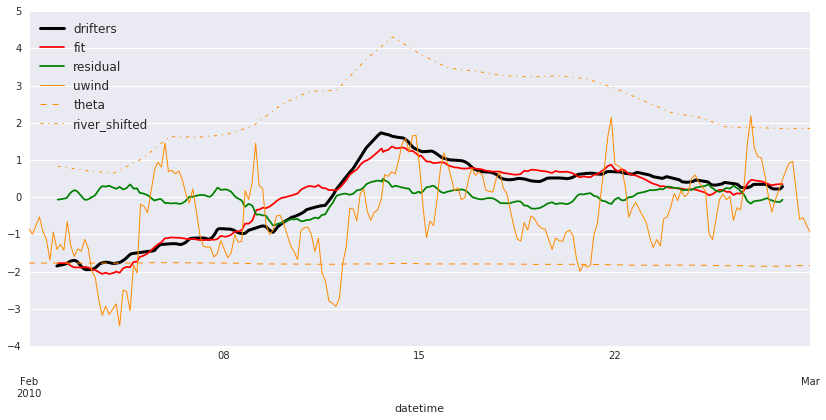

In [1]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 'theta', 'river_shifted']
df = pd.read_csv('calcs/df_2010-07_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


#### July 2011

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      drifters_subtidal   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1470.
Date:                Wed, 29 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:34:49   Log-Likelihood:                -2166.4
No. Observations:                2363   AIC:                             4341.
Df Residuals:                    2359   BIC:                             4364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.5448      0.016    -34.142      0.000        -0.576    -0.513
uwind            -0.3968      0.014    -27.892      0.000        -0.425    -0.369
s                -0.2437      0.015    -16.045      0.000        -0.273    -0.214
river_shifted     0.8490      0.014     62.866      0.000         0.823     0.875
==============================================================================
Omnibus:                       84.054   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.339
Skew:                           0.385   Prob(JB):                     2.65e-17
Kurtosis:                       2.571   Cond. No.                         2.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

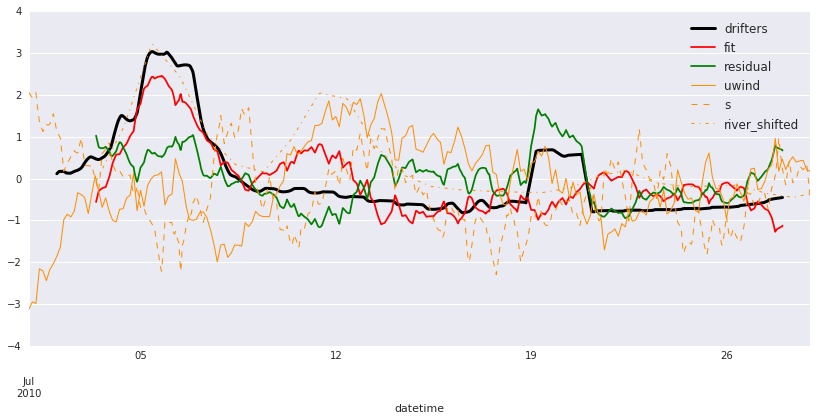

In [2]:
%matplotlib inline
from statsmodels.formula.api import ols
import pandas as pd
import plots
import calcs

cols = ['uwind', 's', 'river_shifted']
df = pd.read_csv('calcs/df_2011-07_forward.csv', parse_dates=True, index_col=0)
dfscaled = calcs.scaled(df, cols)
model = ols('drifters_subtidal ~ ' + ' + '.join(cols), data=dfscaled).fit()
plots.fit(model, dfscaled, cols)
model.summary()


Find that we can explain individual time periods well. But can correlations from one time period produce another? No since the individual results are so different.

### Tidal part

Do we need to explain the tidal part individually? Test: Use subtidal parameters to fit the original signal and see what the residual looks like. Should be tidal and maybe drifters that exit bay enter again afterward. Though then why in Feb 2010 signal do the drifters outside the domain decrease later in the month? Why wouldn't they mostly stay outside?

## Cross-validation

Can we use a larger grouping of time periods in our analysis, then predict another? This is like using more groups for training.

[might need run other cases of conditions. Like since I found that the time for river water exiting the bay in Feb 2010 was 1 day, I could use time periods with less river water maybe.

Here I could look back at the combined river and wind conditions at other times in the blended model product to choose more example if needed. Show plots of the two together.

## Notes to add somewhere

Bayesian information Criterion [(BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

| ΔBIC   |	Evidence against higher BIC       |
|--------|-------------------------------------|
| 0 to 2 |	Not worth more than a bare mention |
| 2 to 6 | Positive |
| 6 to 10 |	Strong |
| >10 |	Very Strong |


[Scaling variables:](http://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia)

>In regression, it is often recommended to center the variables so that the predictors have mean 00. This makes it so the intercept term is interpreted as the expected value of YiYi when the predictor values are set to their means. Otherwise, the intercept is interpreted as the expected value of YiYi when the predictors are set to 0, which may not be a realistic or interpretable situation (e.g. what if the predictors were height and weight?). Another practical reason for scaling in regression is when one variable has a very large scale, e.g. if you were using population size of a country as a predictor. In that case, the regression coefficients may be on a very small order of magnitude (e.g. 10−610−6) which can be a little annoying when you're reading computer output, so you may convert the variable to, for example, population size in millions. The convention that you standardize predictions primarily exists so that the units of the regression coefficients are the same.

>As @gung alludes to and @MånsT shows explicitly (+1 to both, btw), centering/scaling does not effect your statistical inference in regression models - the estimates are adjusted appropriately and the pp-values will be the same.

>Other situations where centering and/or scaling may be useful:

>* when you're trying to sum or average variables that are on different scales, perhaps to create a composite score of some kind. Without scaling, it may be the case that one variable has a larger impact on the sum due purely to its scale, which may be undesirable.
>* To simplify calculations and notation. For example, the sample covariance matrix of a matrix of values centered by their sample means is simply X′XX′X. Similarly, if a univariate random variable XX has been mean centered, then var(X)=E(X2)var(X)=E(X2) and the variance can be estimated from a sample by looking at the sample mean of the squares of the observed values.
>* Related to aforementioned, PCA can only be interpreted as the singular value decomposition of a data matrix when the columns have first been centered by their means.

>Note that scaling is not necessary in the last two bullet points I mentioned and centering may not be necessary in the first bullet I mentioned, so the two do not need to go hand and hand at all times.


[Standardize variables](http://stats.stackexchange.com/questions/13267/how-to-sum-two-variables-that-are-on-different-scales/13271#13271) by:

$C_{scaled} = (C - C_{mean})/ C_{std}$

# Backward-moving

#### Drifters entering domain: Feb 2010 backward

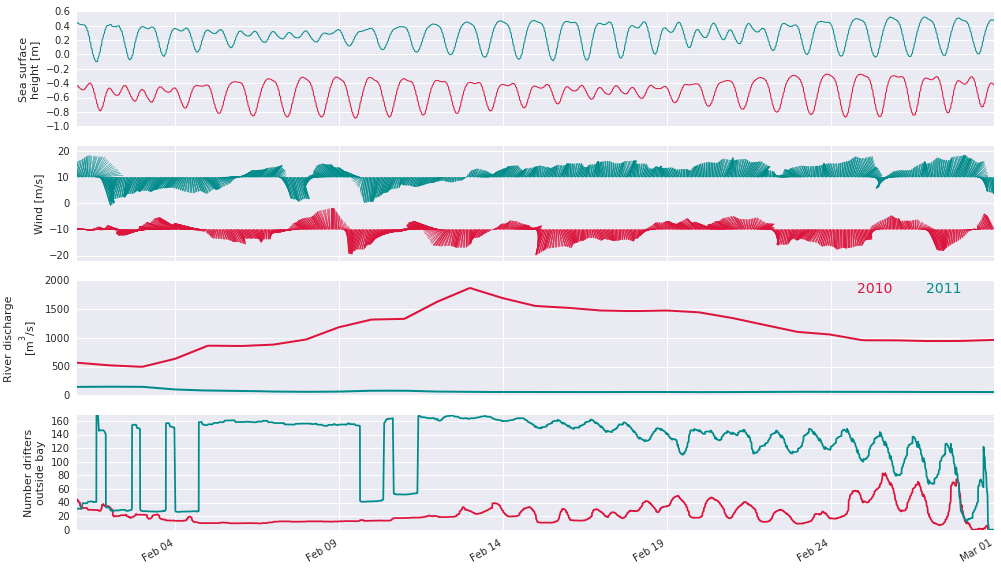

In [2]:
plots.conditions(season='winter', direction='backward')